In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("BMX_G.csv")
df.head()

,Unnamed: 0,seqn,bmdstats,bmxwt,bmiwt,bmxrecum,bmirecum,bmxhead,bmihead,bmxht,...,bmxarmc,bmiarmc,bmxwaist,bmiwaist,bmxsad1,bmxsad2,bmxsad3,bmxsad4,bmdavsad,bmdsadcm
0,1,62161,1,69.2,NaN,NaN,NaN,NaN,NaN,172.3,...,32.5,NaN,81.0,NaN,17.7,17.9,NaN,NaN,17.8,NaN
1,2,62162,1,12.7,NaN,95.7,NaN,NaN,NaN,94.7,...,16.6,NaN,45.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,62163,1,49.4,NaN,NaN,NaN,NaN,NaN,168.9,...,22.0,NaN,64.6,NaN,15.6,15.5,NaN,NaN,15.6,NaN
3,4,62164,1,67.2,NaN,NaN,NaN,NaN,NaN,170.1,...,29.3,NaN,80.1,NaN,18.3,18.5,NaN,NaN,18.4,NaN
4,5,62165,1,69.1,NaN,NaN,NaN,NaN,NaN,159.4,...,29.7,NaN,86.7,NaN,21.0,20.8,NaN,NaN,20.9,NaN


In [3]:
df.describe()

,Unnamed: 0,seqn,bmdstats,bmxwt,bmiwt,bmxrecum,bmirecum,bmxhead,bmihead,bmxht,...,bmxarmc,bmiarmc,bmxwaist,bmiwaist,bmxsad1,bmxsad2,bmxsad3,bmxsad4,bmdavsad,bmdsadcm
count,9338.000000,9338.000000,9338.000000,9243.000000,379.000000,1079.000000,31.0,236.000000,0.0,8615.000000,...,8826.000000,373.0,8204.000000,456.0,6795.000000,6795.000000,398.000000,398.000000,6795.000000,485.000000
mean,4669.500000,67042.749411,1.150032,61.528919,2.963061,82.634291,1.0,41.286017,NaN,155.425374,...,28.326615,1.0,86.223976,1.0,21.063532,21.048094,22.355276,22.371106,21.070052,1.286598
std,2695.792741,2817.037722,0.518151,31.827296,0.446867,14.393892,0.0,2.581393,NaN,23.782055,...,7.896273,0.0,22.365236,0.0,4.857035,4.873057,4.973082,4.979150,4.863505,0.868602
min,1.000000,62161.000000,1.000000,3.600000,1.000000,48.300000,1.0,34.600000,NaN,82.000000,...,10.500000,1.0,38.700000,1.0,10.000000,9.900000,11.000000,11.100000,10.000000,1.000000
25%,2335.250000,64605.250000,1.000000,36.000000,3.000000,70.600000,1.0,39.400000,NaN,148.900000,...,22.200000,1.0,70.275000,1.0,17.400000,17.400000,18.825000,18.800000,17.400000,1.000000
50%,4669.500000,67048.500000,1.000000,64.500000,3.000000,85.200000,1.0,41.450000,NaN,162.100000,...,29.250000,1.0,86.900000,1.0,20.600000,20.600000,22.450000,22.300000,20.600000,1.000000
75%,7003.750000,69478.750000,1.000000,82.700000,3.000000,94.750000,1.0,43.025000,NaN,171.300000,...,34.000000,1.0,101.500000,1.0,24.300000,24.300000,25.500000,25.500000,24.300000,1.000000
max,9338.000000,71916.000000,4.000000,216.100000,4.000000,115.600000,1.0,48.400000,NaN,204.500000,...,58.100000,1.0,176.000000,1.0,40.400000,40.800000,36.400000,36.400000,40.600000,5.000000


In [7]:
df.shape

(9338, 27)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9338 entries, 0 to 9337
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9338 non-null   int64  
 1   seqn        9338 non-null   int64  
 2   bmdstats    9338 non-null   int64  
 3   bmxwt       9243 non-null   float64
 4   bmiwt       379 non-null    float64
 5   bmxrecum    1079 non-null   float64
 6   bmirecum    31 non-null     float64
 7   bmxhead     236 non-null    float64
 8   bmihead     0 non-null      float64
 9   bmxht       8615 non-null   float64
 10  bmiht       268 non-null    float64
 11  bmxbmi      8602 non-null   float64
 12  bmdbmic     3355 non-null   float64
 13  bmxleg      6955 non-null   float64
 14  bmileg      354 non-null    float64
 15  bmxarml     8826 non-null   float64
 16  bmiarml     369 non-null    float64
 17  bmxarmc     8826 non-null   float64
 18  bmiarmc     373 non-null    float64
 19  bmxwaist    8204 non-null  

In [11]:
df.isnull().sum()  

Unnamed: 0       0
seqn             0
bmdstats         0
bmxwt           95
bmiwt         8959
bmxrecum      8259
bmirecum      9307
bmxhead       9102
bmihead       9338
bmxht          723
bmiht         9070
bmxbmi         736
bmdbmic       5983
bmxleg        2383
bmileg        8984
bmxarml        512
bmiarml       8969
bmxarmc        512
bmiarmc       8965
bmxwaist      1134
bmiwaist      8882
bmxsad1       2543
bmxsad2       2543
bmxsad3       8940
bmxsad4       8940
bmdavsad      2543
bmdsadcm      8853
dtype: int64

In [13]:
df.mean()

Unnamed: 0     4669.500000
seqn          67042.749411
bmdstats          1.150032
bmxwt            61.528919
bmiwt             2.963061
bmxrecum         82.634291
bmirecum          1.000000
bmxhead          41.286017
bmihead                NaN
bmxht           155.425374
bmiht             2.582090
bmxbmi           25.339537
bmdbmic           2.459314
bmxleg           38.185564
bmileg            1.000000
bmxarml          32.878881
bmiarml           1.000000
bmxarmc          28.326615
bmiarmc           1.000000
bmxwaist         86.223976
bmiwaist          1.000000
bmxsad1          21.063532
bmxsad2          21.048094
bmxsad3          22.355276
bmxsad4          22.371106
bmdavsad         21.070052
bmdsadcm          1.286598
dtype: float64

In [15]:
df.mode()

,Unnamed: 0,seqn,bmdstats,bmxwt,bmiwt,bmxrecum,bmirecum,bmxhead,bmihead,bmxht,...,bmxarmc,bmiarmc,bmxwaist,bmiwaist,bmxsad1,bmxsad2,bmxsad3,bmxsad4,bmdavsad,bmdsadcm
0,1,62161,1.0,65.3,3.0,96.8,1.0,40.2,NaN,166.9,...,29.5,1.0,97.0,1.0,21.0,19.0,23.0,21.5,21.9,1.0
1,2,62162,NaN,75.9,NaN,NaN,NaN,NaN,NaN,173.2,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,62163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,62164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,62165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9333,9334,71912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9334,9335,71913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9335,9336,71914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9336,9337,71915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# handling missing values
df.fillna(df.mean() , inplace=True)   # fillna refres to filling not available values with mean
# inplace is true because we want our existing dataframe to be modified, not making new one
# if we set inplace as false, we make new df, but we don't need the unmodified df and because of that we set it as true
print("Missing values after imputation:\n")
df.isnull().sum()

Missing values after imputation:



Unnamed: 0       0
seqn             0
bmdstats         0
bmxwt            0
bmiwt            0
bmxrecum         0
bmirecum         0
bmxhead          0
bmihead       9338
bmxht            0
bmiht            0
bmxbmi           0
bmdbmic          0
bmxleg           0
bmileg           0
bmxarml          0
bmiarml          0
bmxarmc          0
bmiarmc          0
bmxwaist         0
bmiwaist         0
bmxsad1          0
bmxsad2          0
bmxsad3          0
bmxsad4          0
bmdavsad         0
bmdsadcm         0
dtype: int64

In [19]:
# So we don't have any values for bmihead and all the 9338 columns are nan 
print(df["bmihead"].isnull().sum())
print(df["bmihead"].notnull().sum())

9338
0


In [21]:
# so because we have no values, we must remove the whole column
df.drop(columns=["bmihead"], inplace=True)

In [23]:
df.head()
# now you can see we imputate all missing values and we drop the bmihead from our df

,Unnamed: 0,seqn,bmdstats,bmxwt,bmiwt,bmxrecum,bmirecum,bmxhead,bmxht,bmiht,...,bmxarmc,bmiarmc,bmxwaist,bmiwaist,bmxsad1,bmxsad2,bmxsad3,bmxsad4,bmdavsad,bmdsadcm
0,1,62161,1,69.2,2.963061,82.634291,1.0,41.286017,172.3,2.58209,...,32.5,1.0,81.0,1.0,17.700000,17.900000,22.355276,22.371106,17.800000,1.286598
1,2,62162,1,12.7,2.963061,95.700000,1.0,41.286017,94.7,2.58209,...,16.6,1.0,45.4,1.0,21.063532,21.048094,22.355276,22.371106,21.070052,1.286598
2,3,62163,1,49.4,2.963061,82.634291,1.0,41.286017,168.9,2.58209,...,22.0,1.0,64.6,1.0,15.600000,15.500000,22.355276,22.371106,15.600000,1.286598
3,4,62164,1,67.2,2.963061,82.634291,1.0,41.286017,170.1,2.58209,...,29.3,1.0,80.1,1.0,18.300000,18.500000,22.355276,22.371106,18.400000,1.286598
4,5,62165,1,69.1,2.963061,82.634291,1.0,41.286017,159.4,2.58209,...,29.7,1.0,86.7,1.0,21.000000,20.800000,22.355276,22.371106,20.900000,1.286598


In [29]:
# standardization 
# in this part we just scale the continues numerical values.
# and we don't mention bmdstats in our standardization because it's distreect and we cannot scale پیوسته و گسسته values together. 

numerical_columns = ["bmxwt", "bmiwt", "bmxrecum", "bmirecum", "bmxhead", "bmxht", "bmiht", "bmxbmi", "bmdbmic", "bmxleg", "bmileg", "bmxarml", "bmiarml", "bmxarmc", "bmiarmc", "bmxwaist", "bmiwaist", "bmxsad1", "bmxsad2", "bmxsad3", "bmxsad4", "bmdavsad", "bmdsadcm"]
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df[numerical_columns].head())


      bmxwt         bmiwt  bmxrecum  bmirecum       bmxhead     bmxht  \
0  0.242271  9.878773e-15  0.000000       0.0 -1.735118e-14  0.738770   
1 -1.542131  9.878773e-15  2.671605       0.0 -1.735118e-14 -2.658553   
2 -0.383060  9.878773e-15  0.000000       0.0 -1.735118e-14  0.589918   
3  0.179106  9.878773e-15  0.000000       0.0 -1.735118e-14  0.642454   
4  0.239112  9.878773e-15  0.000000       0.0 -1.735118e-14  0.174009   

          bmiht    bmxbmi   bmdbmic    bmxleg  ...   bmxarmc  bmiarmc  \
0 -3.223834e-15 -0.275378  0.000000  0.574260  ...  0.543671      0.0   
1 -3.223834e-15 -1.504061 -0.931343  0.000000  ... -1.527637      0.0   
2 -3.223834e-15 -1.085499 -0.931343  0.602768  ... -0.824174      0.0   
3 -3.223834e-15 -0.288880  0.000000  0.659782  ...  0.126804      0.0   
4 -3.223834e-15  0.251200  1.096338  1.115898  ...  0.178912      0.0   

   bmxwaist  bmiwaist   bmxsad1   bmxsad2       bmxsad3       bmxsad4  \
0 -0.249212       0.0 -0.811874 -0.757374 -6.9294

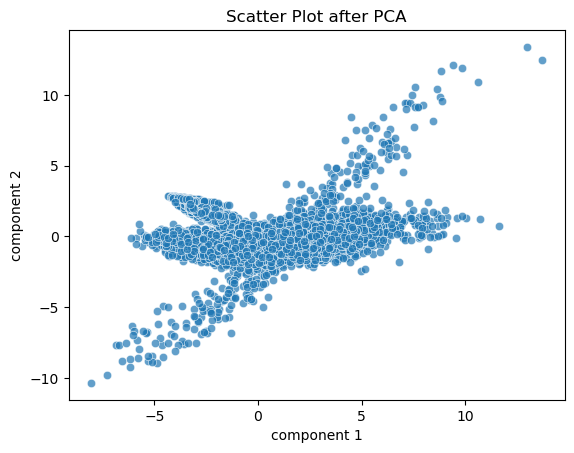

In [91]:
# here I used PCA to reduce the deminsions into 2 and see the data visually with scatterplot.
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df[numerical_columns])

pca_df = pd.DataFrame(pca_data, columns=["component 1", "component 2"])

sns.scatterplot(data=pca_df, x="component 1", y="component 2", alpha=0.7)
plt.title("Scatter Plot after PCA")
plt.show()

In [41]:
# Elbow Method to find the optimal number of clusters 
inertia = []
for k in range(1, 11):  # Trying different numbers of clusters (1 to 10)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_columns])   
    inertia.append(kmeans.inertia_)

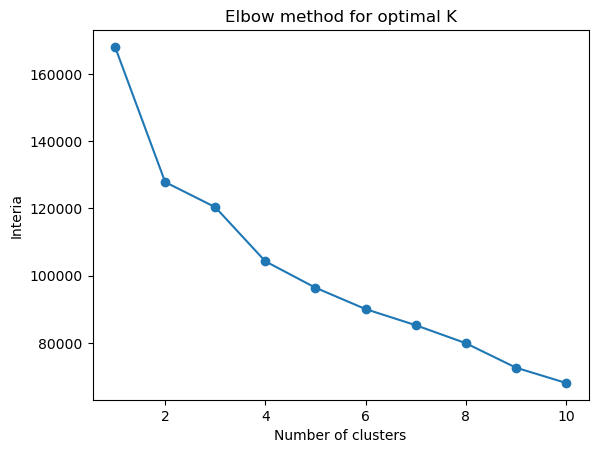

In [43]:
# Plotting the inertia values to find the elbow point
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow method for optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("Interia")    # inertia measures how well the data points are clustered around their centroids.
plt.show()
# k=3 is the best k. as you can see after k=3 the reduction is so rush

In [63]:
# K-means
kmeans = KMeans(n_clusters=3 , random_state=42)
df["cluster"] = kmeans.fit_predict(df[numerical_columns])   # I used fit_predict to show me the clusters immediately
print(df[["cluster"] + numerical_columns].head())
print("Number of iterations for convergence:", kmeans.n_iter_)

   cluster     bmxwt         bmiwt  bmxrecum  bmirecum       bmxhead  \
0        1  0.242271  9.878773e-15  0.000000       0.0 -1.735118e-14   
1        1 -1.542131  9.878773e-15  2.671605       0.0 -1.735118e-14   
2        1 -0.383060  9.878773e-15  0.000000       0.0 -1.735118e-14   
3        1  0.179106  9.878773e-15  0.000000       0.0 -1.735118e-14   
4        0  0.239112  9.878773e-15  0.000000       0.0 -1.735118e-14   

      bmxht         bmiht    bmxbmi   bmdbmic  ...   bmxarmc  bmiarmc  \
0  0.738770 -3.223834e-15 -0.275378  0.000000  ...  0.543671      0.0   
1 -2.658553 -3.223834e-15 -1.504061 -0.931343  ... -1.527637      0.0   
2  0.589918 -3.223834e-15 -1.085499 -0.931343  ... -0.824174      0.0   
3  0.642454 -3.223834e-15 -0.288880  0.000000  ...  0.126804      0.0   
4  0.174009 -3.223834e-15  0.251200  1.096338  ...  0.178912      0.0   

   bmxwaist  bmiwaist   bmxsad1   bmxsad2       bmxsad3       bmxsad4  \
0 -0.249212       0.0 -0.811874 -0.757374 -6.929410e-15

In [59]:
print(df.groupby("cluster")[numerical_columns].mean()) # as you can see we have 3 clusters based on k = 3

            bmxwt     bmiwt      bmxrecum  bmirecum       bmxhead     bmxht  \
cluster                                                                       
0        0.885332  0.035639  0.000000e+00       0.0 -1.735118e-14  0.583328   
1       -0.680512 -0.029975  3.712723e-16       0.0 -1.706314e-14 -0.453040   
2       -0.305335  0.101222  0.000000e+00       0.0 -1.735118e-14  0.003972   

                bmiht    bmxbmi   bmdbmic    bmxleg  ...   bmxarmc  bmiarmc  \
cluster                                              ...                      
0        1.137268e-01  0.831976  0.247864  0.280277  ...  0.862111      0.0   
1       -8.830811e-02 -0.632486 -0.189344 -0.207658  ... -0.661907      0.0   
2       -3.223834e-15 -0.595422 -0.137285 -0.438749  ... -0.330580      0.0   

         bmxwaist  bmiwaist   bmxsad1   bmxsad2   bmxsad3   bmxsad4  bmdavsad  \
cluster                                                                         
0        0.855204       0.0  0.756872  0.75691

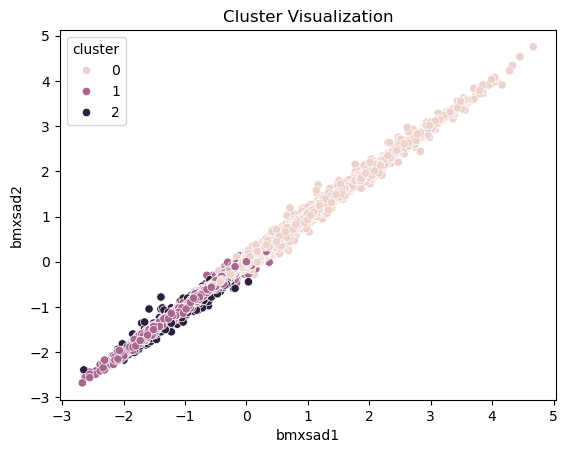

In [77]:
# the scatter of bmxsad1 and bmxsad2 
sns.scatterplot(data=df, x="bmxsad1", y="bmxsad2", hue="cluster")
plt.title("Cluster Visualization")
plt.show()

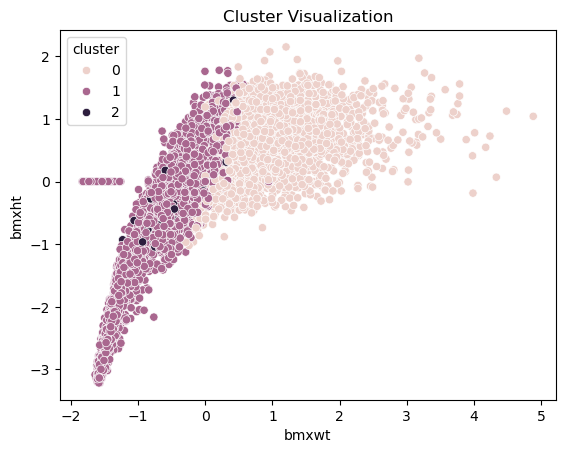

In [73]:
# the scatter of bmxwt and bmxht
sns.scatterplot(data=df, x="bmxwt", y="bmxht", hue="cluster")
plt.title("Cluster Visualization")
plt.show()